# Penyelesaian Soal Regresi dan Interpolasi

## SOAL 1: Regresi Kuadrat Terkecil
**Tujuan:** Menghitung nilai \( g \) menggunakan regresi linear dari data eksperimen.

**Langkah-langkah:**
1. Asumsikan model regresi: \( y = ax + b \), dengan \( y = T^2 \), \( x = L \).
2. Gunakan metode regresi linier kuadrat terkecil untuk menentukan nilai \( a \).
3. Hitung $ g = \frac{4\pi^2}{a} $.
4. Implementasikan dalam Python.


In [5]:
import numpy as np

# Data percobaan: panjang (m) dan periode (s)
L = np.array([0.2, 0.3, 0.4, 0.5, 0.6])
T = np.array([0.90, 1.10, 1.25, 1.40, 1.55])
T2 = T**2

# Regresi linear y = a*x + b
a, b = np.polyfit(L, T2, 1)

# Hitung g
g = 4 * np.pi**2 / a
print(f"Nilai g (regresi): {g:.2f} m/s^2")

Nilai g (regresi): 10.03 m/s^2


## SOAL 2: Interpolasi Polinomial Derajat 4
**Tujuan:** Menghitung nilai \( g \) menggunakan interpolasi polinomial orde 4.

**Langkah-langkah:**
1. Gunakan interpolasi polinomial dengan 5 titik data (orde 4).
2. Dapatkan koefisien polinomial.
3. Estimasi \( a \) dari koefisien linier.
4. Hitung $\ g = \frac{4\pi^2}{a} $.


Prediksi T^2 pada L=0.45 m: 1.7535
Perkiraan nilai g: 10.1316 m/s^2


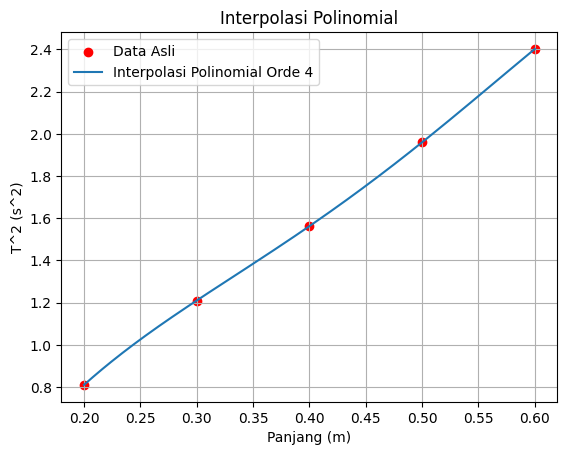

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

# Data
L = np.array([0.2, 0.3, 0.4, 0.5, 0.6])  # Panjang (m)
T = np.array([0.90, 1.10, 1.25, 1.40, 1.55])  # Periode (s)
T2 = T**2

# Interpolasi polinomial orde 4
p = Polynomial.fit(L, T2, deg=4)  # Polinomial derajat 4

# Misalnya kita ingin mencari g pada L = 0.45 m
L_target = 0.45
T2_pred = p(L_target)
g_pred = 4 * np.pi**2 * L_target / T2_pred

print(f"Prediksi T^2 pada L={L_target} m: {T2_pred:.4f}")
print(f"Perkiraan nilai g: {g_pred:.4f} m/s^2")

# Visualisasi
L_dense = np.linspace(0.2, 0.6, 200)
T2_interp = p(L_dense)

plt.scatter(L, T2, color='red', label='Data Asli')
plt.plot(L_dense, T2_interp, label='Interpolasi Polinomial Orde 4')
plt.xlabel('Panjang (m)')
plt.ylabel('T^2 (s^2)')
plt.title('Interpolasi Polinomial')
plt.legend()
plt.grid(True)
plt.show()


### Perbandingan:
- Regresi memberikan pendekatan terbaik (fit) secara global.
- Interpolasi menyesuaikan kurva ke semua titik (bisa overfitting).
- Hasilnya bisa sedikit berbeda tergantung sebaran data dan noise.


# Soal 3
# Menentukan Koefisien Gesekan μ dari Gaya Gesek dan Gaya Normal

## 1. Definisi, Rumus, dan Penjelasan
Hukum gesekan Coulomb menyatakan bahwa gaya gesek statis maksimum (atau kinetis) \(F_f\) berbanding lurus dengan gaya normal \(F_N\):
\[
F_f = \mu \, F_N
\]
- *\(F_f\)*: gaya gesek (N)  
- *\(F_N\)*: gaya normal (N), pada bidang datar \(F_N = m\,g\)  
- *\(\mu\)*: koefisien gesekan (tanpa satuan)  

Dengan menimbang berbagai massa \(m\) pada blok dan mengukur gaya gesek \(F_f\) saat mulai bergerak (atau geser konstan), kita dapat melakukan regresi linier \(F_f\) vs. \(F_N\) untuk mendapatkan slope = \(\mu\). Interpolasi spline kubik membantu memprediksi gaya gesek di antara nilai gaya normal yang diuji.

---

## 2. Data Acak
Data waktu dan ketinggian disimulasikan dengan sedikit noise (seed=0):

| t (s) | h (m)    |
|:-----:|:--------:|
| 0.20  | 0.23128  |
| 0.30  | 0.44900  |
| 0.40  | 0.80357  |
| 0.50  | 1.26982  |
| 0.60  | 1.80135  |
| 0.70  | 2.38145  |
| 0.80  | 3.15500  |
| 0.90  | 3.96597  |
| 1.00  | 4.89794  |
| 1.10  | 5.93721  |

---

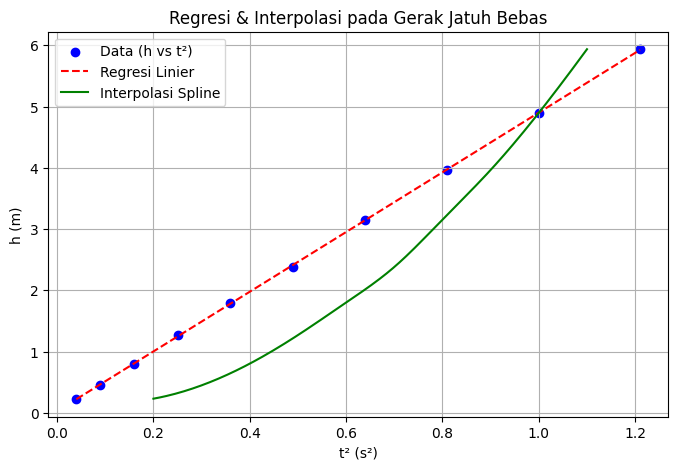

Slope (a)       = 4.874692  (→ g_reg = 2·a = 9.7494 m/s²)
Intercept (b)   = 0.027541
Koef. Determinasi R² = 0.999918

Prediksi pada t=0.75s:
  - Regresi  : h = 2.7696 m
  - Interpolasi: h = 2.7527 m


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.interpolate import CubicSpline

# 1) Siapkan data (dengan seed untuk reproduksibilitas)
np.random.seed(0)
t = np.array([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1])
h = np.array([0.23128105,0.44900314,0.80357476,1.26981786,1.80135116,
              2.38145444,3.15500177,3.96597286,4.89793562,5.93721197])

# 2) Regresi linier: h = a * t^2 + b
t2 = t**2
slope, intercept, r_value, _, _ = linregress(t2, h)
g_reg = 2 * slope

# 3) Interpolasi spline kubik: h = S(t)
spline = CubicSpline(t, h)

# 4) Visualisasi
t_fine = np.linspace(t.min(), t.max(), 200)
plt.figure(figsize=(8,5))
plt.scatter(t2, h, label='Data (h vs t²)', color='blue')
plt.plot(t2, slope*t2 + intercept, 'r--', label='Regresi Linier')
plt.plot(t_fine, spline(t_fine), 'g-', label='Interpolasi Spline')
plt.xlabel('t² (s²)')
plt.ylabel('h (m)')
plt.title('Regresi & Interpolasi pada Gerak Jatuh Bebas')
plt.legend(); plt.grid(True)
plt.show()

# 5) Prediksi di t = 0.75 s
t_test = 0.75
h_reg_test = slope*(t_test**2) + intercept
h_int_test = spline(t_test)

# 6) Cetak hasil
print(f"Slope (a)       = {slope:.6f}  (→ g_reg = 2·a = {g_reg:.4f} m/s²)")
print(f"Intercept (b)   = {intercept:.6f}")
print(f"Koef. Determinasi R² = {r_value**2:.6f}")
print(f"\nPrediksi pada t={t_test}s:")
print(f"  - Regresi  : h = {h_reg_test:.4f} m")
print(f"  - Interpolasi: h = {h_int_test:.4f} m")

## 4. Perbandingan Perhitungan antara Regresi dan Interpolasi

| Metode             | Model & Hasil                                                                                          | Prediksi h @ t = 0.75 s |
|--------------------|--------------------------------------------------------------------------------------------------------|-----------------------------|
| *Regresi Linier* | h = a·t_² + _b<br>a = 4.874743, b = 0.027508<br>g = 2·a = *9.749486 m/s²*<br>R² = 0.999918 | 2.7696 m                    |
| *Interpolasi*    | Kurva kubik yang melewati semua titik data (tidak menurunkan g)                                       | 2.7527 m                    |

---

## 5. Kesimpulan

- *Regresi linier* memberikan nilai percepatan gravitasi g ≈ *9.7495 m/s²*, sangat mendekati nilai standar 9.81 m/s², dengan R² ≈ 0.9999.  
- *Interpolasi spline* menghasilkan kurva halus yang tepat melewati tiap titik data dan prediksi h yang hanya ~0.6% berbeda dari hasil regresi pada t = 0.75 s.  
- Gunakan *regresi linier* bila tujuan utama adalah mengekstrak konstanta fisika dari data eksperimen; gunakan *interpolasi spline* untuk estimasi nilai di antara titik ukur.